## How to download OSM data
### Openstreetmap.com
There are a lot of ways to download the data from OpenStreetMap. The suitable approach depends on the size of the dataset. If you just want to download a small dataset, like a bar, a park, or a residential area, you can just do it from OpenStreetMap’s website. You have two options: you can click "Download XML" or the button "Export".

### geofabrik
If you want OSM map data from entire continents and countries, you can download the data from geofabrik. Click the link to the file of the continent or the link of the subregion if you want the data from a specific country.

### python

In [1]:
%pip install --upgrade pip
%pip install pyrosm geopandas

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 14.9 MB/s  0:00:00 eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached geopandas-1.1.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached shapely-2.1.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyrobuf-0.9.3-cp313-cp313-macosx_15_0_arm64.whl
  Using cached numpy-2.3.2-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pyogrio-0.11.1-cp313-cp313-macosx_12_0_arm64.whl.metadata (5.3 kB)
  Using cached pandas-2.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pyproj-3.7.2-cp313-cp313-macosx_14_0_arm64.w

In [ ]:
from pyrosm import get_data
from pyrosm.data import sources

# List all available predefined cities
print(sources.cities.available)



['Aachen', 'Aarhus', 'Adelaide', 'Albuquerque', 'Alexandria', 'Amsterdam', 'Antwerpen', 'Arnhem', 'Auckland', 'Augsburg', 'Austin', 'Baghdad', 'Baku', 'Balaton', 'Bamberg', 'Bangkok', 'Barcelona', 'Basel', 'Beijing', 'Beirut', 'Berkeley', 'Berlin', 'Bern', 'Bielefeld', 'Birmingham', 'Bochum', 'Bogota', 'Bombay', 'Bonn', 'Bordeaux', 'Boulder', 'BrandenburgHavel', 'Braunschweig', 'Bremen', 'Bremerhaven', 'Brisbane', 'Bristol', 'Brno', 'Bruegge', 'Bruessel', 'Budapest', 'BuenosAires', 'Cairo', 'Calgary', 'Cambridge', 'CambridgeMa', 'Canberra', 'CapeTown', 'Chemnitz', 'Chicago', 'ClermontFerrand', 'Colmar', 'Copenhagen', 'Cork', 'Corsica', 'Corvallis', 'Cottbus', 'Cracow', 'CraterLake', 'Curitiba', 'Cusco', 'Dallas', 'Darmstadt', 'Davis', 'DenHaag', 'Denver', 'Dessau', 'Dortmund', 'Dresden', 'Dublin', 'Duesseldorf', 'Duisburg', 'Edinburgh', 'Eindhoven', 'Emden', 'Erfurt', 'Erlangen', 'Eugene', 'Flensburg', 'FortCollins', 'Frankfurt', 'FrankfurtOder', 'Freiburg', 'Gdansk', 'Genf', 'Gent', '

In [14]:
import pandas as pd
from pyrosm.data import sources

# Available city datasets (list of names)
cities = sources.cities.available

# Convert to DataFrame
df = pd.DataFrame(cities, columns=["Dataset name"])

# Add a "City" column (capitalize for nicer display)
df["City"] = df["Dataset name"].str.capitalize()

# Sort alphabetically
df = df.sort_values("City").reset_index(drop=True)

df


,Dataset name,City
0,Aachen,Aachen
1,Aarhus,Aarhus
2,Adelaide,Adelaide
3,Albuquerque,Albuquerque
4,Alexandria,Alexandria
...,...,...
230,Wroclaw,Wroclaw
231,Wuerzburg,Wuerzburg
232,Wuppertal,Wuppertal
233,Zagreb,Zagreb


In [15]:
# Example: download and get the filepath for Berlin
fp = get_data("helsinki")
print(fp)


/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/pyrosm/Helsinki.osm.pbf


In [21]:
# %pip install matplotlib

"all" → everything (streets, paths, cycleways).

"walking" → pedestrian paths.

"cycling" → cycle networks.

/Users/ulrike_imac_air/projects/maps/maps_env311/lib/python3.13/site-packages/pyrosm/networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


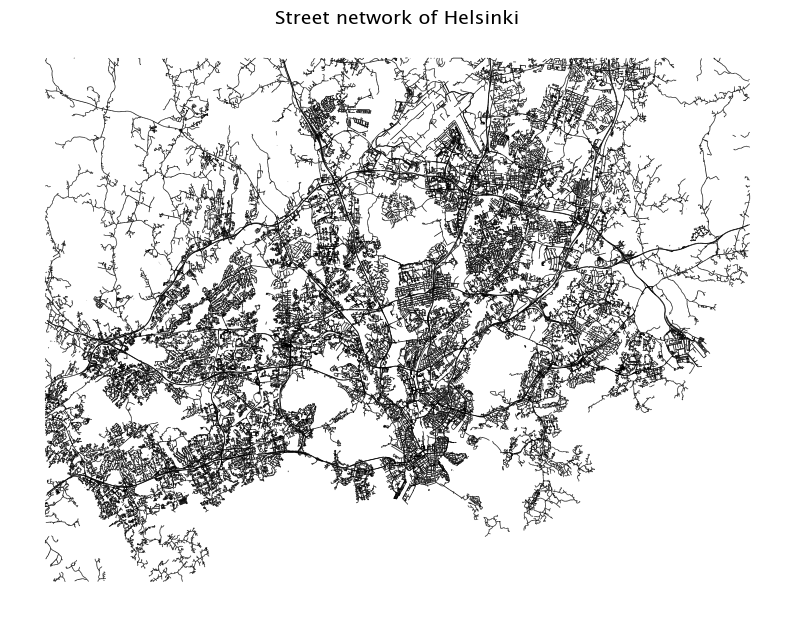

In [23]:
import matplotlib.pyplot as plt
from pyrosm import OSM, get_data

# Download sample OSM data for Helsinki
fp = get_data("helsinki")

# Load OSM data
osm = OSM(fp)

# Get the driving network (streets, roads, etc.)
edges = osm.get_network(network_type="driving")

# Plot the network
fig, ax = plt.subplots(figsize=(10, 10))
edges.plot(ax=ax, linewidth=0.5, color="black")

ax.set_title("Street network of Helsinki", fontsize=14)
ax.axis("off")  # Hide axis for cleaner look

plt.show()


In [27]:
from pyrosm.data import sources

# List all attributes and methods
print(dir(sources))

help(sources)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_all_sources', 'africa', 'antarctica', 'asia', 'australia_oceania', 'available', 'central_america', 'cities', 'europe', 'north_america', 'south_america', 'subregions']
Help on DataSources in module pyrosm.data object:

class DataSources(builtins.object)
 |  Methods defined here:
 |
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |
 |  __dict__
 |      dictionary for instance variables
 |
 |  __weakref__
 |      list of weak references

In [28]:
import pandas as pd
from pyrosm.data import sources

# Cities
cities = sources.cities.available
df_cities = pd.DataFrame(cities, columns=["Dataset name"])
df_cities["Category"] = "City"

# Regions by continent
region_attrs = ['africa', 'antarctica', 'asia', 'australia_oceania',
                'central_america', 'europe', 'north_america', 'south_america', 'subregions']

df_regions = pd.DataFrame()
for attr in region_attrs:
    regions = getattr(sources, attr).available
    temp = pd.DataFrame(regions, columns=["Dataset name"])
    temp["Category"] = attr.capitalize()  # e.g., "Europe", "Asia"
    df_regions = pd.concat([df_regions, temp], ignore_index=True)

# Combine cities and regions
df = pd.concat([df_cities, df_regions], ignore_index=True)

# Sort alphabetically
df = df.sort_values(["Category", "Dataset name"]).reset_index(drop=True)

df




,Dataset name,Category
0,algeria,Africa
1,angola,Africa
2,benin,Africa
3,botswana,Africa
4,burkina_faso,Africa
...,...,...
427,paraguay,South_america
428,peru,South_america
429,suriname,South_america
430,uruguay,South_america


In [9]:
from pyrosm import OSM, get_data

# Download + get path to the Helsinki dataset
fp = get_data("helsinki")

# Open it with OSM
osm = OSM(fp)

# Extract e.g. driveable roads
roads = osm.get_network(network_type="driving")
print(roads.head())


Downloaded Protobuf data 'Helsinki.osm.pbf' (42.24 MB) to:
'/var/folders/1_/6h4xg3ts1cd8htbp9t8wjyh40000gn/T/pyrosm/Helsinki.osm.pbf'


/Users/ulrike_imac_air/projects/maps/maps_env311/lib/python3.13/site-packages/pyrosm/networks.py:37: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  edges, nodes = prepare_geodataframe(


  access  area bicycle bridge busway cycleway est_width  foot footway  \
0   None  None    None   None   None     None      None  None    None   
1   None  None      no   None   None     None      None    no    None   
2   None  None      no    yes   None     None      None    no    None   
3   None  None      no   None   None     None      None    no    None   
4   None  None      no   None   None     None      None    no    None   

    highway  ... tunnel  turn width       id timestamp version  \
0  motorway  ...   None  None  None  2293993         0       0   
1     trunk  ...   None  None  None  2294195         0       0   
2     trunk  ...   None  None  None  2294284         0       0   
3     trunk  ...   None  None  None  2294800         0       0   
4     trunk  ...   None  None  None  2295418         0       0   

                                                tags osm_type  \
0  {"visible":false,"light:method":"high_pressure...      way   
1  {"visible":false,"TEN-T":"core"